# Лабораторная работа 5. Эвристические алгоритмы

### Вариант: **13**

**Цель работы:** ознакомление с  эвристическими алгоритмами  и методикой оценки  их эффективности.

#### Задание 1.
Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа.

| Вариант | Лабиринт | 
|:---|:---|
|  13  | 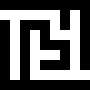 |

а) Используя волновой алгоритм вручную построить оптимальный путь через лабиринт.

| Лабиринт | Решение |
|:---|:---|
| 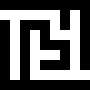 | 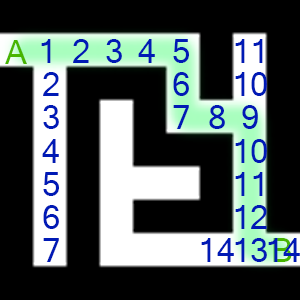 |

б) Используя маршрутный алгоритм вручную построить оптимальный путь через лабиринт.

| Лабиринт | Решение |
|:---|:---|
| 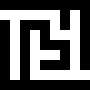 | 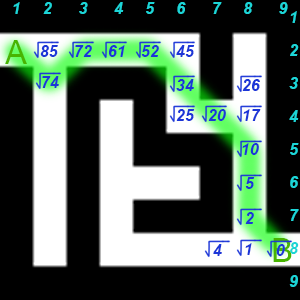 |


## Задание 2.

Дан либиринт. Вход в лабиринт находится сверху слева, выход - снизу справа. 
Реализовав алгоритм в соответствии с заданием построить оптимальный путь через лабиринт.

| Вариант | Лабиринт | Алгоритм |
|:---|:---|:---|
| 13  | 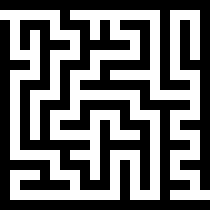 | Двухлучевой алгоритм |



In [71]:
maze = [
'% % % % % % % % % % % % % % % % % % % % %',
'A . . . . . % . . . . . . . . . % . . . %',
'% . % % % . % % % . % . % % % . % . % . %',
'% . % . % . . . % . % . . . % . % . % . %',
'% . % . % % % . % % % % % . % . % . % . %',
'% . . . % . . . % . . . . . % . % . % . %',
'% % % . % . % % % . % % % % % . % . % % %',
'% . . . % . % . . . % . . . . . % . . . %',
'% . % % % . % . % % % % % % % . % % % . %',
'% . % . . . % . . . . . . . % . . . . . %',
'% . % . % % % . % % % % % . % % % % % . %',
'% . % . % . . . % . . . % . . . % . . . %',
'% . % . % . % % % . % . % % % . % . % % %',
'% . % . % . . . . . % . . . % . % . . . %',
'% . % % % % % % % . % % % % % . % % % . %',
'% . . . . . % . . . % . . . % . % . . . %',
'% % % % % . % % % . % . % . % . % . % % %',
'% . . . % . . . % . % . % . % . % . . . %',
'% . % % % % % . % % % . % . % . % % % . %',
'% . . . . . . . . . . . % . . . % . . . B',
'% % % % % % % % % % % % % % % % % % % % %',
]

for index, line in enumerate(maze):
    maze[index] = line.split()
    for i, elem in enumerate(maze[index]):
        if elem == '.':
            maze[index][i] = ' '
    
def print_maze(maze):
    for line in maze:
        print(' '.join(line))


In [72]:
def solve_maze(maze):
    start = 1, 0
    end = 19, 20
    
    visited_left = set()
    visited_right = set()
    queue_left = deque([(start, [])])
    queue_right = deque([(end, [])])
    
    while queue_left and queue_right:
        current_left, path_left = queue_left.popleft()
        current_right, path_right = queue_right.popleft()
        
        visited_left.add(current_left)
        visited_right.add(current_right)
        
        if current_left == current_right:
            return path_left + path_right[::-1]
        
        neighbors_left = get_neighbors(maze, current_left)
        neighbors_right = get_neighbors(maze, current_right)
        
        for neighbor in neighbors_left:
            if neighbor not in visited_left:
                queue_left.append((neighbor, path_left + [neighbor]))
        
        for neighbor in neighbors_right:
            if neighbor not in visited_right:
                queue_right.append((neighbor, path_right + [neighbor]))
        
        # Отображение промежуточных шагов и отметка пройденных путей обоих лучей
        # print_maze_with_paths(maze, path_left, path_right)
    
    return None


def get_neighbors(maze, cell):
    neighbors = []
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
    
    for direction in directions:
        new_row = cell[0] + direction[0]
        new_col = cell[1] + direction[1]
        
        if is_valid(maze, new_row, new_col):
            neighbors.append((new_row, new_col))
    
    return neighbors

def is_valid(maze, row, col):
    num_rows = len(maze)
    num_cols = len(maze[0])
    
    return row >= 0 and row < num_rows and col >= 0 and col < num_cols and maze[row][col] != '%'

def print_maze_with_paths(maze, path_left, path_right):
    maze_copy = [list(row) for row in maze]
    
    for cell in path_left:
        maze_copy[cell[0]][cell[1]] = 'A'
    
    for cell in path_right:
        maze_copy[cell[0]][cell[1]] = 'B'
    
    for row in maze_copy:
        print(' '.join(row))
    
    print('\n')

In [73]:
solution = solve_maze(maze)

if solution:
    print(f"Путь найден ({len(solution) + 1}):")
    for step in solution:
        for row, line in enumerate(maze):
            for col, elem in enumerate(line):
                if step == (row, col):
                    maze[row][col] = '.'
    print_maze(maze)
else:
    print("Путь не найден.")

Путь найден (115):
% % % % % % % % % % % % % % % % % % % % %
A .         %         . . . . . %       %
% . % % %   % % %   % . % % % . %   %   %
% . %   %       %   % . . . % . %   %   %
% . %   % % %   % % % % % . % . %   %   %
% . . . %       % . . . . . % . %   %   %
% % % . %   % % % . % % % % % . %   % % %
% . . . %   % . . . %         . %       %
% . % % %   % . % % % % % % % . % % %   %
% . %       % . . . . . . . % . . . . . %
% . %   % % %   % % % % % . % % % % % . %
% . %   %       %       % . . . % . . . %
% . %   %   % % %   %   % % % . % . % % %
% . %   %           %       % . % . . . %
% . % % % % % % %   % % % % % . % % % . %
% . . . . . %       % . . . % . % . . . %
% % % % % . % % %   % . % . % . % . % % %
%       % . . . %   % . % . % . % . . . %
%   % % % % % . % % % . % . % . % % % . %
%             . . . . . % . . . %     . B
% % % % % % % % % % % % % % % % % % % % %
